In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('base-alugueis-sp.csv')
df.head()

address      district  area  bedrooms  garage  \
0          Rua Herval    Belenzinho    21         1       0   
1  Avenida S√£o Miguel  Vila Marieta    15         1       1   
2    Rua Oscar Freire     Pinheiros    18         1       0   
3    Rua J√∫lio Sayago       Vila R√©    56         2       2   
4  Rua Barata Ribeiro    Bela Vista    19         1       0   

                 type  rent  total  
0     Studio e kitnet  2400   2939  
1     Studio e kitnet  1030   1345  
2         Apartamento  4000   4661  
3  Casa em condom√≠nio  1750   1954  
4     Studio e kitnet  4000   4654

In [61]:
df.describe() # Aqui conseguimos ver diversas estat√≠sticas b√°sicas ao mesmo tempo e mais a frente veremos uma a uma

area      bedrooms        garage          rent         total
count  11657.000000  11657.000000  11657.000000  11657.000000  11657.000000
mean      84.655658      1.966286      1.060393   3250.814789   4080.030625
std       74.020536      0.931313      1.132349   2650.711557   3352.480274
min        0.000000      0.000000      0.000000    500.000000    509.000000
25%       40.000000      1.000000      0.000000   1590.000000   1996.000000
50%       60.000000      2.000000      1.000000   2415.000000   3057.000000
75%       96.000000      3.000000      2.000000   3800.000000   4774.000000
max      580.000000      6.000000      6.000000  25000.000000  28700.000000

In [2]:
df.info() # Os tipos est√£o corretos e sem valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11657 entries, 0 to 11656
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   address   11657 non-null  object
 1   district  11657 non-null  object
 2   area      11657 non-null  int64 
 3   bedrooms  11657 non-null  int64 
 4   garage    11657 non-null  int64 
 5   type      11657 non-null  object
 6   rent      11657 non-null  int64 
 7   total     11657 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 728.7+ KB


In [3]:
df.isna().sum() # Mostrando de maneira mais √≥bvia que n√£o existem nulos

address     0
district    0
area        0
bedrooms    0
garage      0
type        0
rent        0
total       0
dtype: int64

 Como podemos observar abaixo, a medida que o n√∫mero de banheiros, garagens e a √°rea constru√≠da aumentam n√≥s temos o aluguel mais caro e um valor total que tamb√©m √© maior. 


In [4]:
df.min() # O menor valor de aluguel √© de 500 reais com total de 509

address     25 de Mar√ßo
district      Aclima√ß√£o
area                  0
bedrooms              0
garage                0
type        Apartamento
rent                500
total               509
dtype: object

In [5]:
df.max() # O aluguel mais caro √© 25 mil reais com 28 mil e 700 de total

address       dos Pinheiros
district          √Ågua Rasa
area                    580
bedrooms                  6
garage                    6
type        Studio e kitnet
rent                  25000
total                 28700
dtype: object

In [6]:
df.mean() # Aqui observamos que a m√©dia do aluguel √© de 3251 reais, e a m√©dia de √°rea √© de 84.7 m√©tros quadrados 

area          84.655658
bedrooms       1.966286
garage         1.060393
rent        3250.814789
total       4080.030625
dtype: float64

In [7]:
df.median() # A mediana dos dados aponta que metade dos alugueis √© de at√© 2415 reais e uma √°rea de 60 m¬≤

area          60.0
bedrooms       2.0
garage         1.0
rent        2415.0
total       3057.0
dtype: float64

In [8]:
df.corr().style.background_gradient() # Podemos observar correla√ß√µes positivas entre todas as colunas.

array([[<Axes: title={'center': 'area'}>,
        <Axes: title={'center': 'bedrooms'}>],
       [<Axes: title={'center': 'garage'}>,
        <Axes: title={'center': 'rent'}>],
       [<Axes: title={'center': 'total'}>, <Axes: >]], dtype=object)

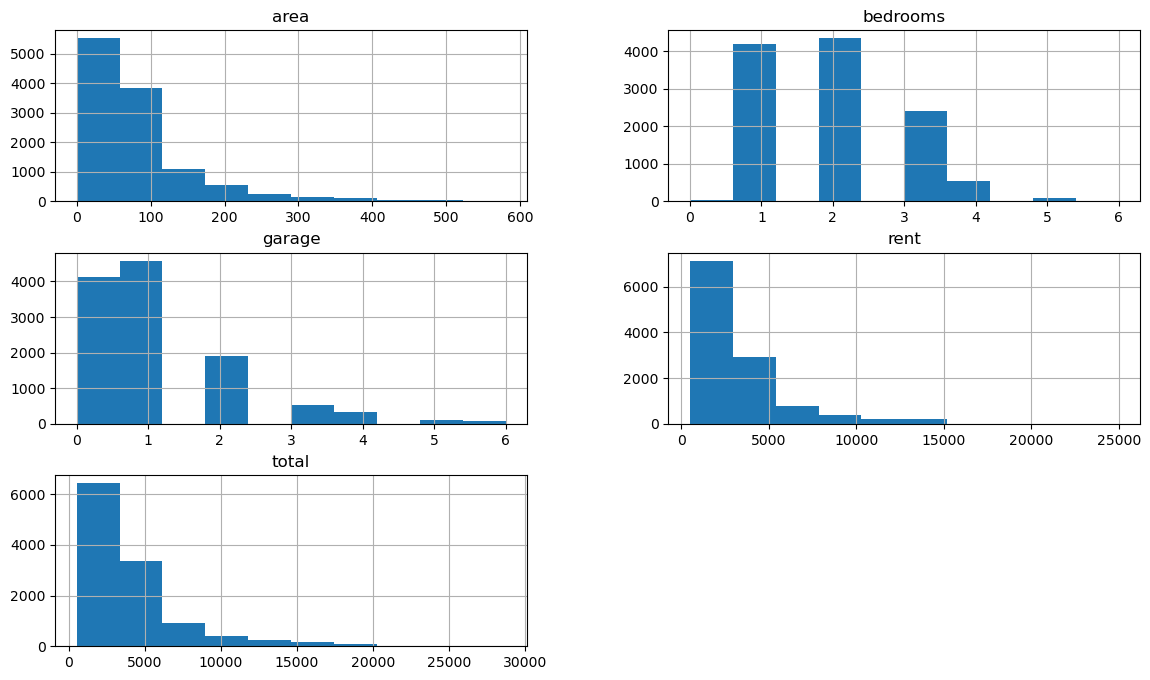

In [9]:
df.hist(figsize=(14,8))

In [10]:
df['address'].value_counts() # Podemos usar pandas.get_dummies para as vari√°veis 'address' e 'district', mas ter√≠amos muitas colunas
# Essas colunas tamb√©m poderiam trazer informa√ß√µes que tornariam nosso modelo pior (causando multicolinearidade ou Overfitting)
# Com isso em mente, optei por retirar essas vari√°veis e utilizar somente o tipo de apartamento

Rua da Consola√ß√£o                      49
Rua Bela Cintra                        47
Avenida Brigadeiro Lu√≠s Ant√¥nio        36
Avenida Ipiranga                       32
Avenida Nove de Julho                  29
                                       ..
Rua Passo da P√°tria                     1
Rua Teixeira Leite                      1
Avenida Professor Abra√£o de Morais      1
Rua Doutor Joaquim D'aquino Fonseca     1
Rua Ab√≠lio Borin                        1
Name: address, Length: 5348, dtype: int64

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

A seguir podemos ver um gr√°fico da correla√ß√£o linear entre as vari√°veis explicativas e nossa vari√°vel resposta, retirando "rent" para que n√£o haja vazamento de dados

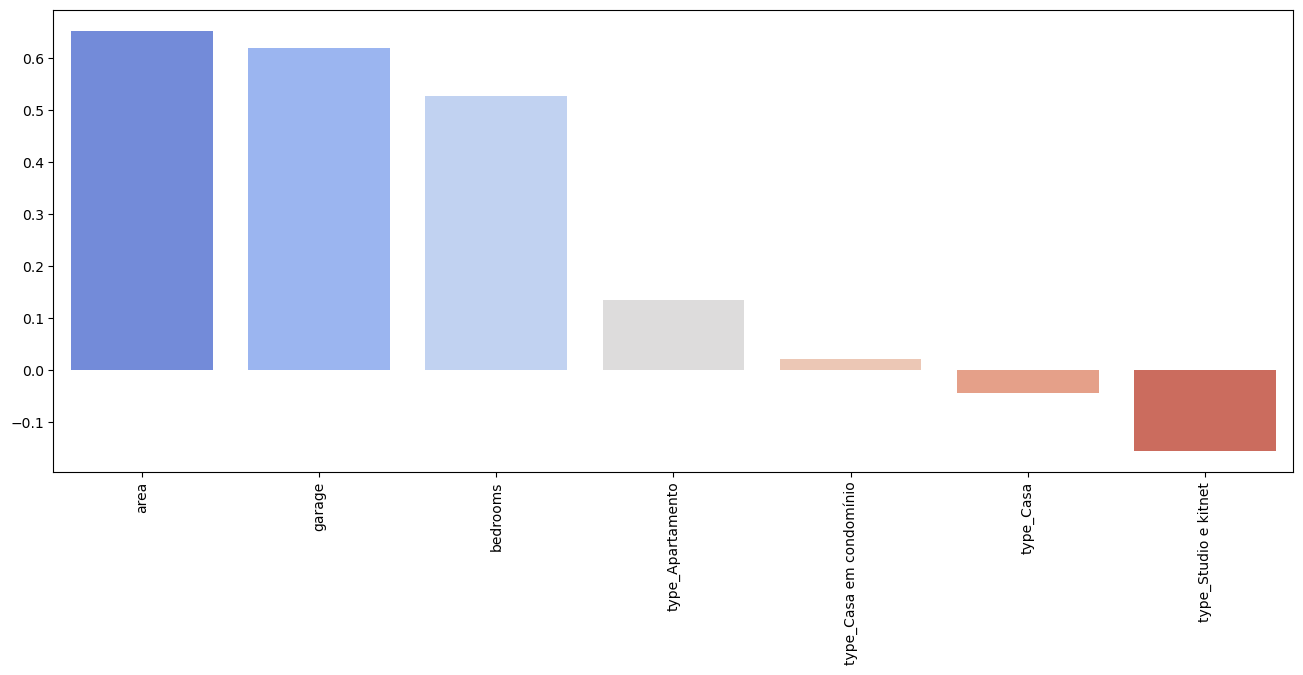

In [79]:
dummies = pd.get_dummies(df.drop('address',axis=1).drop('district',axis=1).drop('rent',axis=1))
valores = dummies.corr()['total'].sort_values(ascending=False)[1:]

fig, ax = plt.subplots(figsize= (16, 6))
sns.barplot(x=valores.index, y=valores.values, palette='coolwarm')
ax.tick_params(axis='x', rotation=90)
ax.set_xlabel('')

plt.show()

A seguir testaremos incluir o distrito para ver o impacto negativo na previs√£o

In [46]:
from sklearn.model_selection import train_test_split
df1 = pd.get_dummies(df.drop('address',axis=1))#.drop('district',axis=1))
x = df1.drop(['rent'],axis=1).drop(['total'],axis=1)
y= df1['total']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
X_train.columns

Index(['area', 'bedrooms', 'garage', 'district_Aclima√ß√£o', 'district_Adalgisa',
       'district_Agua Branca', 'district_Alphaville',
       'district_Alphaville Centro Industrial E Empresarial/alphaville.',
       'district_Alphaville Conde Ii', 'district_Alphaville Empresarial',
       ...
       'district_Vila √Ågua Funda', 'district_V√°rzea da Barra Funda',
       'district_√Ågua Branca', 'district_√Ågua Fria', 'district_√Ågua Funda',
       'district_√Ågua Rasa', 'type_Apartamento', 'type_Casa',
       'type_Casa em condom√≠nio', 'type_Studio e kitnet'],
      dtype='object', length=1206)

In [50]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [52]:
reg.score(X_test,y_test) 

-6490267175631656.0

A pontua√ß√£o obtida, -6490267175631656.0, √© extremamente negativa, o que indica que o modelo de regress√£o linear est√° performando muito mal.

O m√©todo reg.score(X_test, y_test) calcula o coeficiente de determina√ß√£o 
ùëÖ
2

 , que √© uma medida estat√≠stica que determina o qu√£o bem as previs√µes do modelo se ajustam aos dados observados. O valor do 
ùëÖ
2

  varia de -‚àû a 1. Aqui est√° o que diferentes valores de 
ùëÖ
2

  significam:


R 
2
 =1: O modelo explica perfeitamente a variabilidade dos dados.

R 
2
 =0: O modelo n√£o explica nada al√©m da m√©dia dos dados.

R 
2
 <0: O modelo est√° fazendo previs√µes piores do que uma linha horizontal que simplesmente prediz a m√©dia dos valores de y_test.
Um valor de 
ùëÖ
2
R 
2
  t√£o negativo como -6490267175631656.0 sugere que o modelo est√° fazendo previs√µes muito piores do que a m√©dia simples dos valores de y_test. Isso pode ocorrer por diversos motivos:

In [57]:
df1 = pd.get_dummies(df.drop('address',axis=1).drop('district',axis=1))
x = df1.drop(['rent'],axis=1).drop(['total'],axis=1)
y= df1['total']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
X_train.columns

Index(['area', 'bedrooms', 'garage', 'type_Apartamento', 'type_Casa',
       'type_Casa em condom√≠nio', 'type_Studio e kitnet'],
      dtype='object')

In [59]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [60]:
reg.score(X_test,y_test)

0.5792823903186528

Aqui, j√° podemos ver que retirando a vari√°vel de distrito obtivemos um ajuste bem melhor. Por√©m, ainda n√£o √© poss√≠vel considerar este modelo
como uma boa fonte de predi√ß√£o. √â prov√°vel que outros modelos se ajustem melhor aos dados, al√©m disso, podem ser necess√°rias mais informa√ß√µes para melhorar a acur√°cia da previs√£o.